<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The [datset](https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5) used in this homework assignment is pulled from NYC OpenData and shows the number of tons that were collected of trash, recylcing, and other materials from residents, schools, and businesses. It tracks these metrics per month from January 1990 through March 2023 for each borough in New York City. I am passionate about sustainability and was curious to visualize the trends in a major city over a long stretch of time.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/JoshForster/Downloads/DSNY_Monthly_Tonnage_Data.csv')
df.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2023 / 03,Bronx,01,504.4,29.3,30.9,NaN,2.6,NaN,NaN,2.0
1,2023 / 03,Bronx,02,343.9,23.2,29.6,NaN,NaN,NaN,NaN,2.0
2,2023 / 03,Bronx,03,449.9,29.3,34.6,NaN,2.3,NaN,NaN,2.0
3,2023 / 03,Bronx,04,880.6,58.9,81.3,NaN,20.3,NaN,NaN,2.0
4,2023 / 03,Bronx,05,803.3,46.1,82.5,NaN,24.0,NaN,NaN,2.0


In [3]:
df.describe()

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
count,22818.000000,20196.000000,19908.000000,1769.000000,1362.000000,868.000000,1658.000000,22818.000000
mean,3754.602928,417.364463,348.719691,76.608932,41.077460,167.015323,26.411339,2.727101
std,1469.905526,267.928476,178.109998,73.888102,28.448561,270.137199,25.187728,1.181360
min,8.400000,0.000000,0.000000,0.400000,0.500000,0.600000,0.400000,1.000000
25%,2624.625000,223.275000,219.975000,22.100000,23.300000,12.875000,9.800000,2.000000
50%,3580.800000,383.800000,327.150000,55.800000,34.000000,58.850000,18.000000,3.000000
75%,4767.875000,553.625000,449.800000,105.500000,50.300000,196.550000,35.200000,4.000000
max,9757.000000,2129.700000,1250.500000,562.700000,229.600000,1857.300000,186.000000,5.000000


In [4]:
df.isnull().sum()

MONTH                      0
BOROUGH                    0
COMMUNITYDISTRICT          0
REFUSETONSCOLLECTED        6
PAPERTONSCOLLECTED      2628
MGPTONSCOLLECTED        2916
RESORGANICSTONS        21055
SCHOOLORGANICTONS      21462
LEAVESORGANICTONS      21956
XMASTREETONS           21166
BOROUGH_ID                 6
dtype: int64

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [145]:
#first of month
df['FO_MONTH'] =  pd.to_datetime(df['MONTH'].apply(lambda x: x.split('/')[-1].strip()+'/01/'+x.split('/')[0].strip()),errors='ignore',format='%m/%d/%y')
#parsing the year from the provided month field
df['YEAR'] = pd.to_datetime(df['MONTH'].apply(lambda x: x.split('/')[0].strip()),errors='ignore',format='%y')

In [144]:
df['YEAR'].unique()

array(['2023 ', '2022 ', '2021 ', '2020 ', '2019 ', '2018 ', '2017 ',
       '2016 ', '2015 ', '2014 ', '2013 ', '2012 ', '2011 ', '2010 ',
       '2009 ', '2008 ', '2007 ', '2006 ', '2005 ', '2004 ', '2003 ',
       '2002 ', '2001 ', '2000 ', '1999 ', '1998 ', '1997 ', '1996 ',
       '1995 ', '1994 ', '1993 ', '1992 ', '1991 ', '1990 '], dtype=object)

In [149]:
df.dtypes

MONTH                   object
BOROUGH                 object
COMMUNITYDISTRICT       object
REFUSETONSCOLLECTED    float64
PAPERTONSCOLLECTED     float64
MGPTONSCOLLECTED       float64
RESORGANICSTONS        float64
SCHOOLORGANICTONS      float64
LEAVESORGANICTONS      float64
XMASTREETONS           float64
BOROUGH_ID             float64
FO_MONTH                object
YEAR                    object
dtype: object

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



The below bar plot is doing the following to customize the visual for improved clarity utilizing guidance from this [demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)
1) Line 9 - 13: looping through the rows to create grouped bars for each borough that are evenly spaced for each collection method
2) Lines 14 - 15: Modifying the y axis label and the title
3) Line 16: Setting the tick position to conform to the groups of the bars and renaming to borough names
4) Line 17: Labeling the legends for custom small text at the top right of the plot
5) Line 18: Pulling the legend information to be able to modify the colors to match each measure/collection method
6) Line 19 - 20: Conforming the legend colors to the bar plot for each collection method

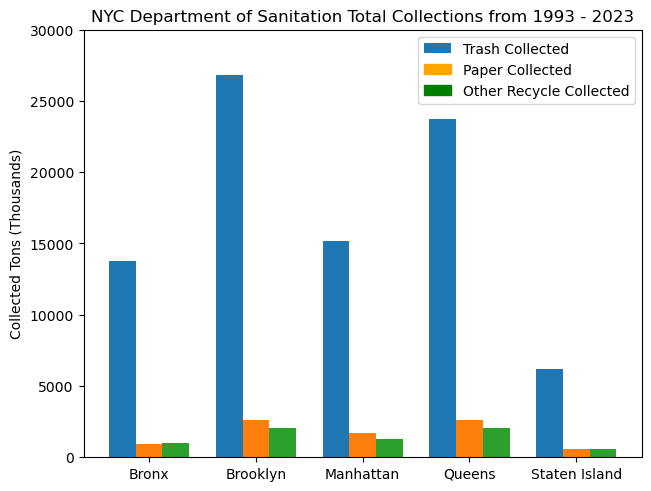

In [128]:
subset = df[['BOROUGH','REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED']]
df_groups = subset.groupby('BOROUGH').sum().divide(1000)
width = 0.25
multiplier = 0
labels = np.arange(len(df_groups))
figure, axis = plt.subplots(layout='constrained')
metrics = ['Trash Collected','Paper Collected','Other Recycle Collected']

for name,value in df_groups.items():
    spacing = width * multiplier
    bars = axis.bar(labels+spacing,value,width,label=value.index.tolist())
    multiplier += 1

axis.set_ylabel('Collected Tons (Thousands)')
axis.set_title('NYC Department of Sanitation Total Collections from 1993 - 2023')
axis.set_xticks(labels+width,value.index.tolist())
axis.legend(metrics,loc='upper right',fontsize='small')
legend = axis.get_legend()
legend.legend_handles[1].set_color('orange')
legend.legend_handles[2].set_color('green')
axis.set_ylim(0,30000)

plt.show();

The major difference between Seaborn and Matplotlib for this visual are that due 
to the simplicity of Seaborn it was easier to transform the data rather than try to customize certain features. 
All of my research for changing legend detail referenced matplotlib so I found it easier to create a new column in my modified dataframe rather than use matplotlib.
I also found grouping the data to be easier after making the dataset longer rather than having standard tidy data given how the graph was color encoded. Overall, for a simpler graphic like this it might be easier to do transformation before building charts in the format that I need as Seaborn can be a bit easier to develop at the outset.

### Explanation of Code:
1) Line  - 2: Made the dataset longer ad the hue parameter would automatically group these values together and appropriately update the ticks. Also, renamed the fields as I was having a hard time finding legend label customization that didn't impact the colors without having to incorporate Matplotlib
2) Line 3: Create grouped barplot with color encoding based on metrics in one column and field names in another.
3) Line 4: Mirroring the labeling used in the Matplotlib plot was fairly easy and clean to do
4) Line 5: Modifying the legend position and font size to match the changes made in the prior plot
5) Line 6: Updating the y-axis limit

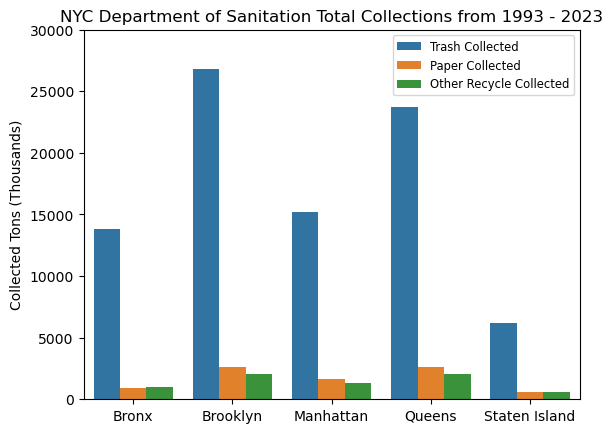

In [205]:
df_sns = df_groups.reset_index().melt(id_vars='BOROUGH')
df_sns['field_name'] = df_sns['variable'].apply(lambda x: 'Trash Collected' if x=='REFUSETONSCOLLECTED' else 'Paper Collected' if x=='PAPERTONSCOLLECTED' else 'Other Recycle Collected') 
bar = sns.barplot(x='BOROUGH', y='value',data=df_sns,hue='field_name')
bar.set(ylabel="Collected Tons (Thousands)",xlabel='',title="NYC Department of Sanitation Total Collections from 1993 - 2023")
bar.legend(loc='upper right',fontsize='small')
bar.set_ylim(0,30000)
plt.show();

The below line plot is showing the number of tons collected in a year for the past decade.
1) Lines 1 - 3: Adding line graphs for the key indicators provided by the Department of Sanitation
2) Lines 5: Modifying the legend text to be consistent with the other graph and easier for users to decifer
3) Line 7-8: Updating the y axis for clarification of the label and creating a title that accurately describes the plot 
4) Line 9: Annotating the year 2023 as only a quarter of data was available at this time which is contributing to the large decrease

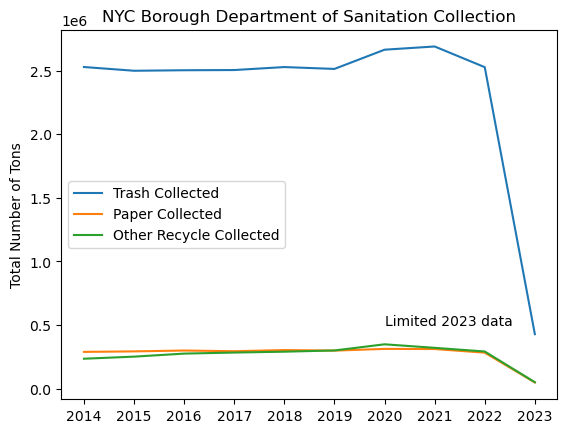

In [178]:
last_ten = df[df['YEAR']>'2013']
last_decade = last_ten.groupby(['YEAR'])[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED']].sum().reset_index()
plt.plot('YEAR','REFUSETONSCOLLECTED',data=last_decade)
plt.plot('YEAR','PAPERTONSCOLLECTED',data=last_decade)
plt.plot('YEAR','MGPTONSCOLLECTED',data=last_decade)
plt.legend(labels=['Trash Collected','Paper Collected','Other Recycle Collected'])
plt.title('Annual NYC Borough Department of Sanitation Collections')
plt.ylabel('Total Number of Tons')
plt.annotate('Limited 2023 data',xy=('2020',0.5*10**6))
plt.show();

This visual was fairly easy to replicate and similarly given the hue parameter it made it easier to just pivot the data to replicate the exact same features. It was nice to cut down the number of lines needed to create the base object used to create this chart

### Explanation of Code:
1) Line 1 - 2: Made the dataset longer as the hue parameter would automatically group these values together and appropriately update the ticks. Also, renamed the fields as I was having a hard time finding legend label customization that didn't impact the colors without having to incorporate Matplotlib
2) Line 3: Create color encoded line graph based on key metrics from the data set in one column and field names in another.
3) Line 4: Annotate the point similar to Matplotlib which were both very easy to do
4) Line 5: Updating the labeling across the chart to be consistent with Matplotlib
5) Line 6: Removing the legend title

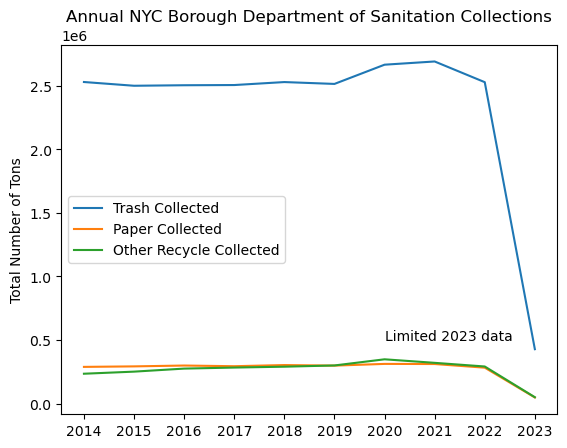

In [214]:
last_decade_long = last_decade.melt(id_vars='YEAR')
last_decade_long['field_name'] = last_decade_long['variable'].apply(lambda x: 'Trash Collected' if x=='REFUSETONSCOLLECTED' else 'Paper Collected' if x=='PAPERTONSCOLLECTED' else 'Other Recycle Collected') 
sns_line = sns.lineplot(x='YEAR',y='value',data=last_decade_long,hue='field_name')
sns_line.annotate('Limited 2023 data',xy=('2020',0.5*10**6))
sns_line.set(ylabel="Total Number of Tons",xlabel='',title="Annual NYC Borough Department of Sanitation Collections")
sns_line.legend(title='')
plt.show();

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

There remains a large gap in terms of the amount of trash versus reusable materials generated by NYC residents irrespective of borough that has existed for quite some time. While I did not explore compost information there was quite a few null values for those fields which indicates that there isn't scaled collection across the city. Perhaps incorporating population to get per capita statistics would further help identify if more waste is created in one particular area. In the future, I hope more New Yorkers start to consider alternatives to single use materials that tend to create the most amount of trash.